<a href="https://colab.research.google.com/github/KJM94/pym/blob/main/src/titanic_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2021/train.csv
/kaggle/input/tabular-playground-series-apr-2021/test.csv


- 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석 도구(pandas, numpy)

- 데이터셋 확인 - null data 확인 후 수정
- 여러 feature 들을 개별적으로 분석하고 feature들 간의 상관관계 확인

- feature engineering : one-hot encoding, class, 구간, 텍스트 데이터 처리

# 1. 데이터셋 확인

In [ ]:
df_train = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
df_test = pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


feature는 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target label은 Survived

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


- pandas dataframe의 describe() 메소드는 각 feature가 가진 통계치를 반환

In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96513.000000,100000.000000,100000.00000,99867.000000
mean,149999.500000,2.368930,30.565796,0.486550,0.49283,45.374804
std,28867.657797,0.878458,14.054634,0.771262,0.92360,65.204725
min,100000.000000,1.000000,0.080000,0.000000,0.00000,0.050000
25%,124999.750000,1.000000,21.000000,0.000000,0.00000,10.130000
50%,149999.500000,3.000000,27.000000,0.000000,0.00000,13.980000
75%,174999.250000,3.000000,40.000000,1.000000,1.00000,37.390000
max,199999.000000,3.000000,81.000000,8.000000,9.00000,680.700000


- PassengerID 숫자와 다른, null data가 존재하는 열(feature)가 있는 것 같음.

- 그래프 시각화

## 1.1 Null data check

In [ ]:
for col in df_train.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value: 0.00%
column:   Survived	 percent of NaN value: 0.00%
column:     Pclass	 percent of NaN value: 0.00%
column:       Name	 percent of NaN value: 0.00%
column:        Sex	 percent of NaN value: 0.00%
column:        Age	 percent of NaN value: 3.29%
column:      SibSp	 percent of NaN value: 0.00%
column:      Parch	 percent of NaN value: 0.00%
column:     Ticket	 percent of NaN value: 4.62%
column:       Fare	 percent of NaN value: 0.13%
column:      Cabin	 percent of NaN value: 67.87%
column:   Embarked	 percent of NaN value: 0.25%


- Age, Cabin, Embarked, Ticket 에서 null data 존재

- MANO 라이브러리는 null data 를 쉽게 확인

<AxesSubplot:>

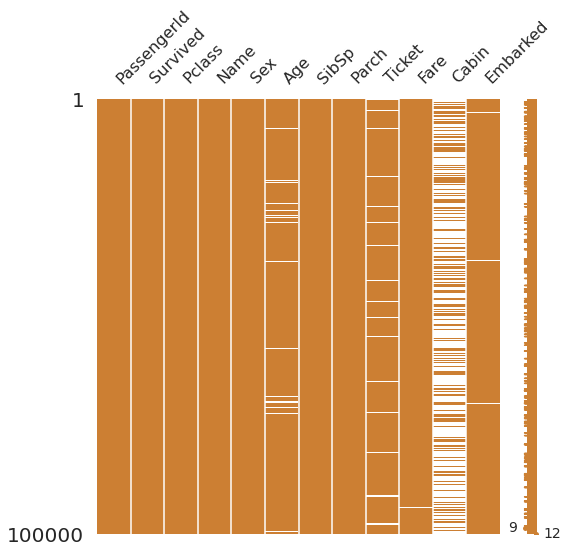

In [ ]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8,0.5,0.2))

<AxesSubplot:>

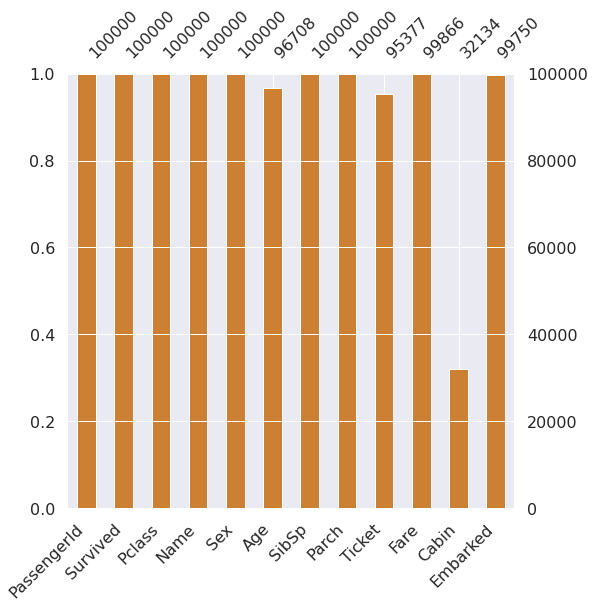

In [ ]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8,0.5,0.2))

<AxesSubplot:>

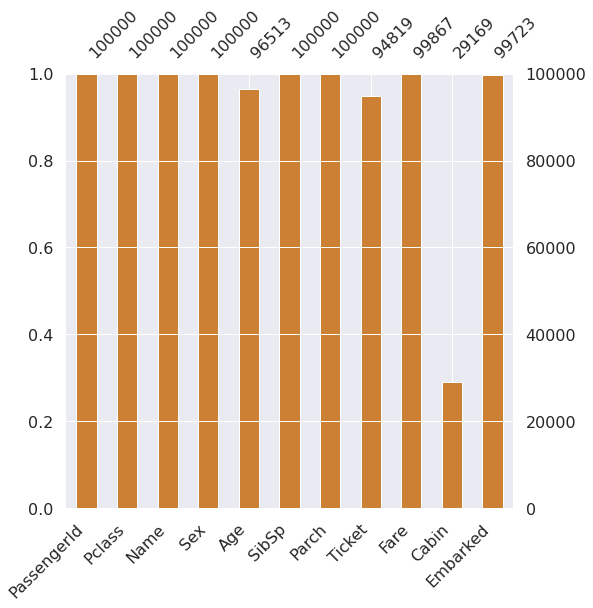

In [ ]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8,0.5,0.2))

## 1.2 Target label 확인
- target label이 어떤 distribution을 갖고 있는지 확인
- 1과 0의 분포에 따라 모델 평가 방법을 달리 해야함

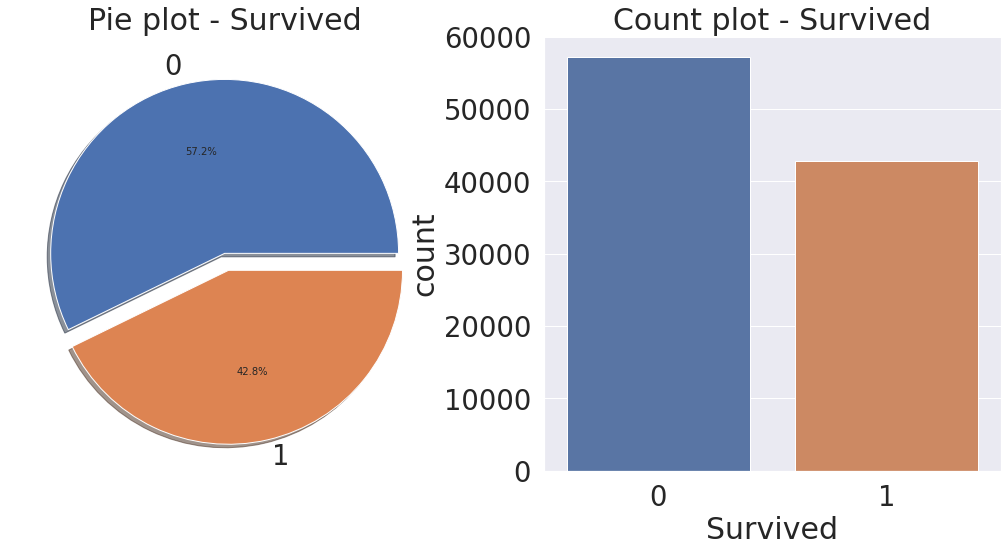

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 42.8% 생존

# 2. Exploratory data analysis

- 데이터 분석을 위한 시각화
- 시각화 라이브러리 matplotlib, seaborn, plotly

## 2.1 Pclass

- 서수형 데이터 카테고리이면서, 순서가 있는 데이터 타입
- Pclass에 따른 생존률 차이 pandas dataframe groupby or pivot

- 'Pclass', 'Survived' 를 가져온 후, pclass로 묶음 각 pclass마다 0, 1이 count 되는데, 이를 평균내면 각 pclass 별 생존률

- count()를 하면, 각 class에 몇명이 있는지 확인, sum()을 하면, 생존한 사람의 총합

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,30315
2,28679
3,41006


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,17576
2,15057
3,10141


- pandas의 crosstab

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


- grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있음.

<AxesSubplot:xlabel='Pclass'>

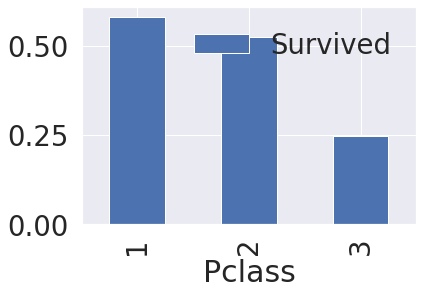

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- Pclass가 높을수록 생존률이 높음
- seaborn의 countplot을 이용하면, 특정 label에 따른 갯수 확인

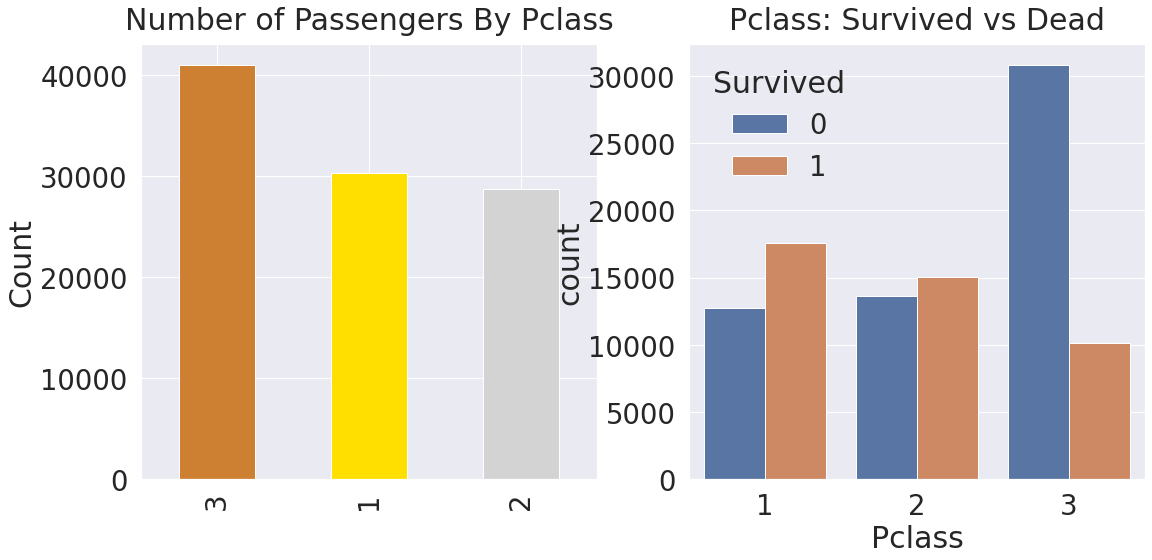

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 생존에 Pclass가 큰 영향을 미치며 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 예상함

## 2.2 Sex
- 성별로 생존률이 달라지는 확인
- pandas groupby 와 seaborn countplot 시각화

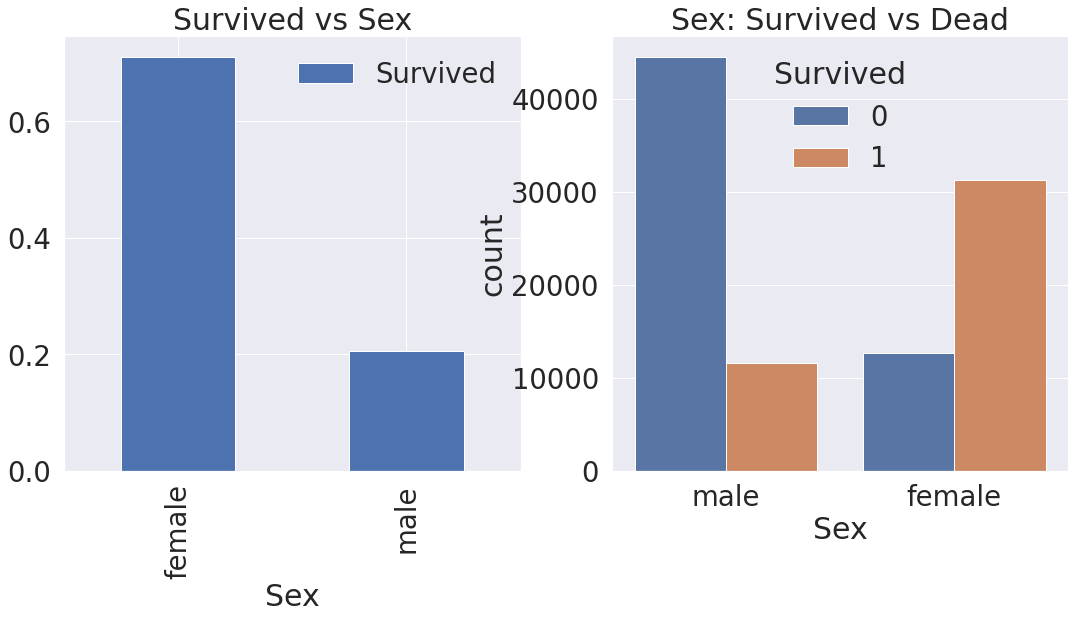

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자가 생존확률이 높음

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.711525
1,male,0.205795


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,12660,31226,43886
male,44566,11548,56114
All,57226,42774,100000


- Sex도 예측모델에 쓰일 Feature

## 2.3 Both Sex and Pclass
- Sex, Pclass 에 관하여 생존이 달라는지 확인
- seaborn의 factorplot을 이용하면 3차원 그래프 그리기 가능

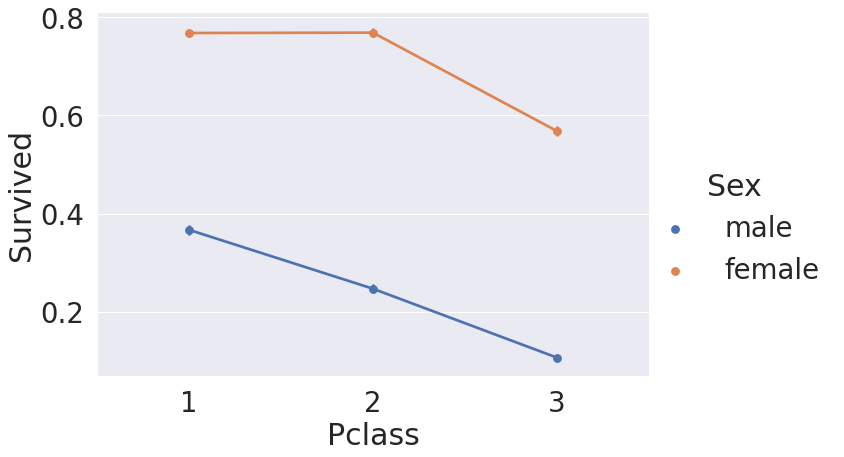

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 클래스에서 female이 살 확률이 male보다 높음
- 클래스가 높을 수록 살 확률이 높음

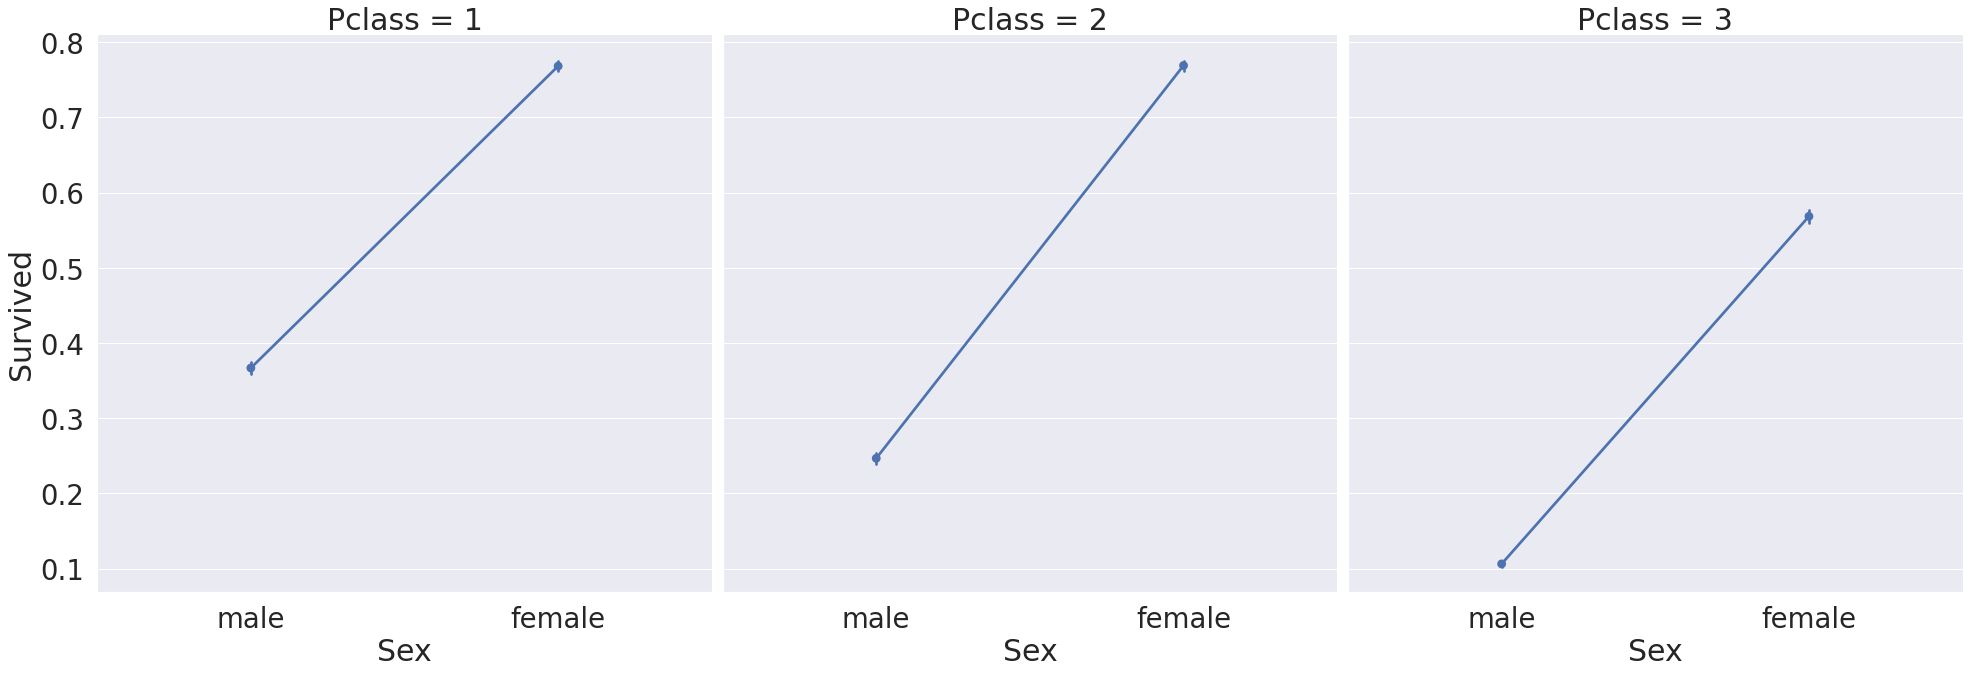

In [ ]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
              size=9, aspect=1)

## 2.4 Age

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()) )
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()) )
print('평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()) )

제일 나이 많은 탑승객 : 87.0 Years
제일 어린 탑승객 : 0.1 Years
평균 나이 : 38.4 Years


- 생존에 따른 Age의 histogram

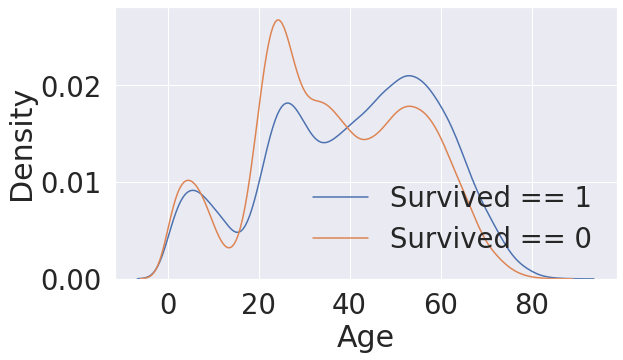

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많음

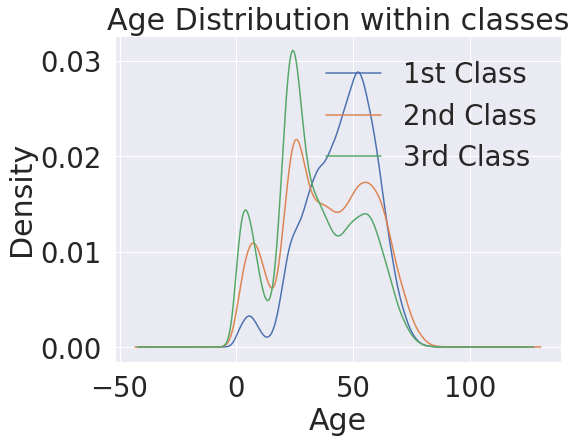

In [ ]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- class가 높을수록 나이 많은 사람이 많아짐

- 나이범위를 넓혀가며, 생존률 변화확인

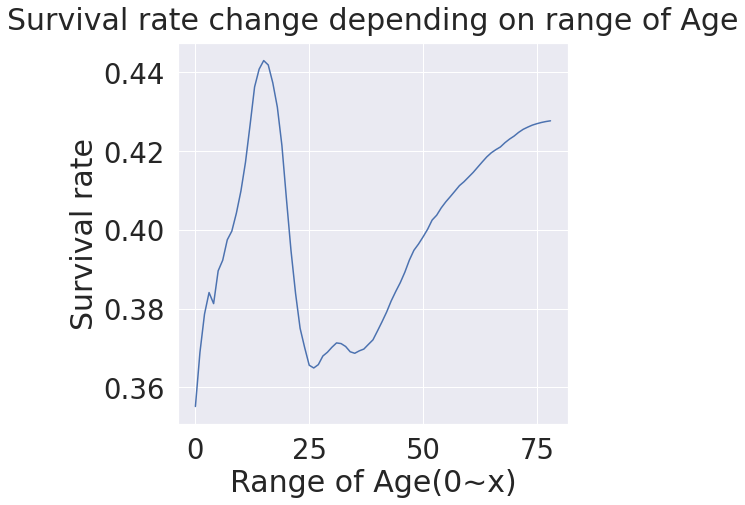

In [ ]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 높음
- 나이가 중요한 feature로 쓰일 수 있음

## 2.5 Pclass, Sex, Age
- 지금까지 본 Sex, Pclass, Age, Survived 모두 보고싶을 때 이를 쉽게 그려주는 것이 seaborn의 violinplot

- x 축은 우리가 나눠서 보고 싶은 case(Pclass, Sex)를 나타내고, y축은 보고싶어하는 distribution(Age)

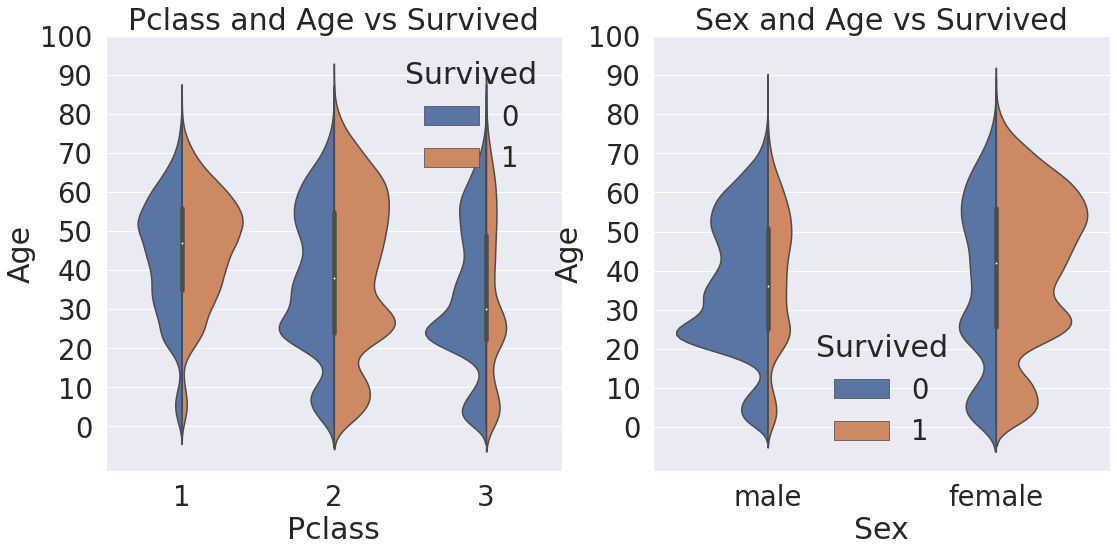

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프
- 오른쪽 그림은 Sex 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프
- 생존만 봤을 때 나이가 어릴수록 생존을 많이 함
- 오른쪽 그림을 보면 여자가 많이 생존함
- 여자와 아이를 먼저 구조

## 2.6 Embarked
- 탑승한 항구
- 탑승한 곳에 따른 생존률

<AxesSubplot:xlabel='Embarked'>

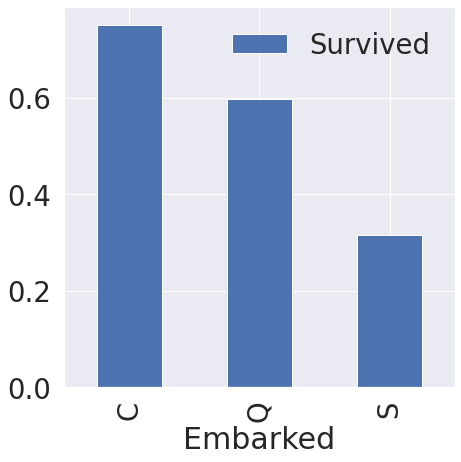

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 차이는 있지만 생존률이 거의 비슷함

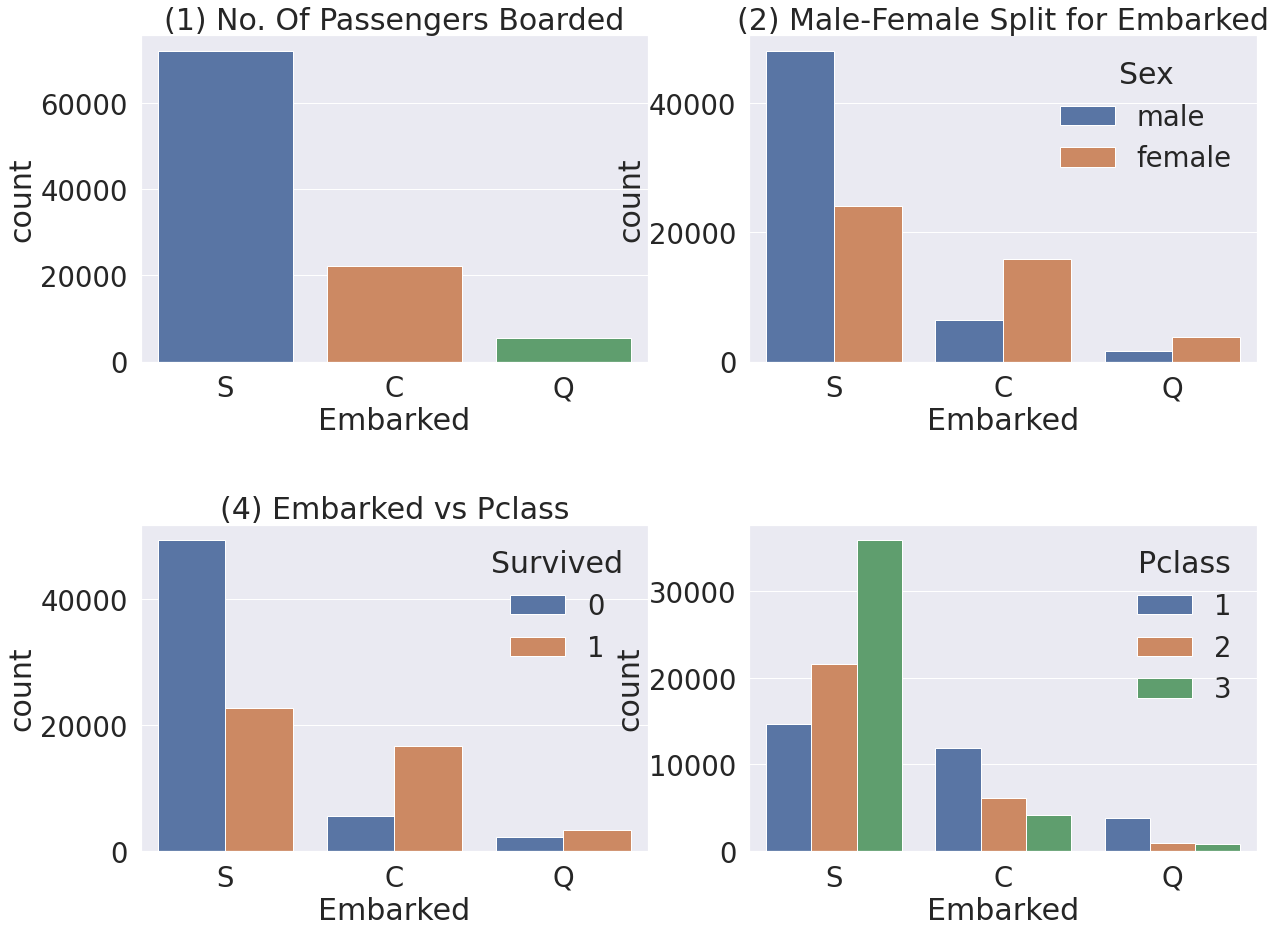

In [ ]:
f,ax=plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 0].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승함

- Figure(2) - C와 Q는 남녀 비율이 비슷하고, S는 남자가 더 많음

- Figure(3) - 생존확률이 S가 많이 낮음

- Figure(4) - Class로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그러함 S는 3rd class가 많아서 생존확률이 낮게 나옴

## 2.7 Family - SibSp(형제, 자매) + Parch(부모, 자녀)
- SibSp + Parch = Family로 분석

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_train['SibSp'] + df_test['Parch'] + 1

In [ ]:
print("Maximum size of Family : ", df_train['FamilySize'].max())
print("Minimum size of Family : ", df_test['FamilySize'].min())

Maximum size of Family :  18
Minimum size of Family :  1


- FamilySize와 생존 관계 분석

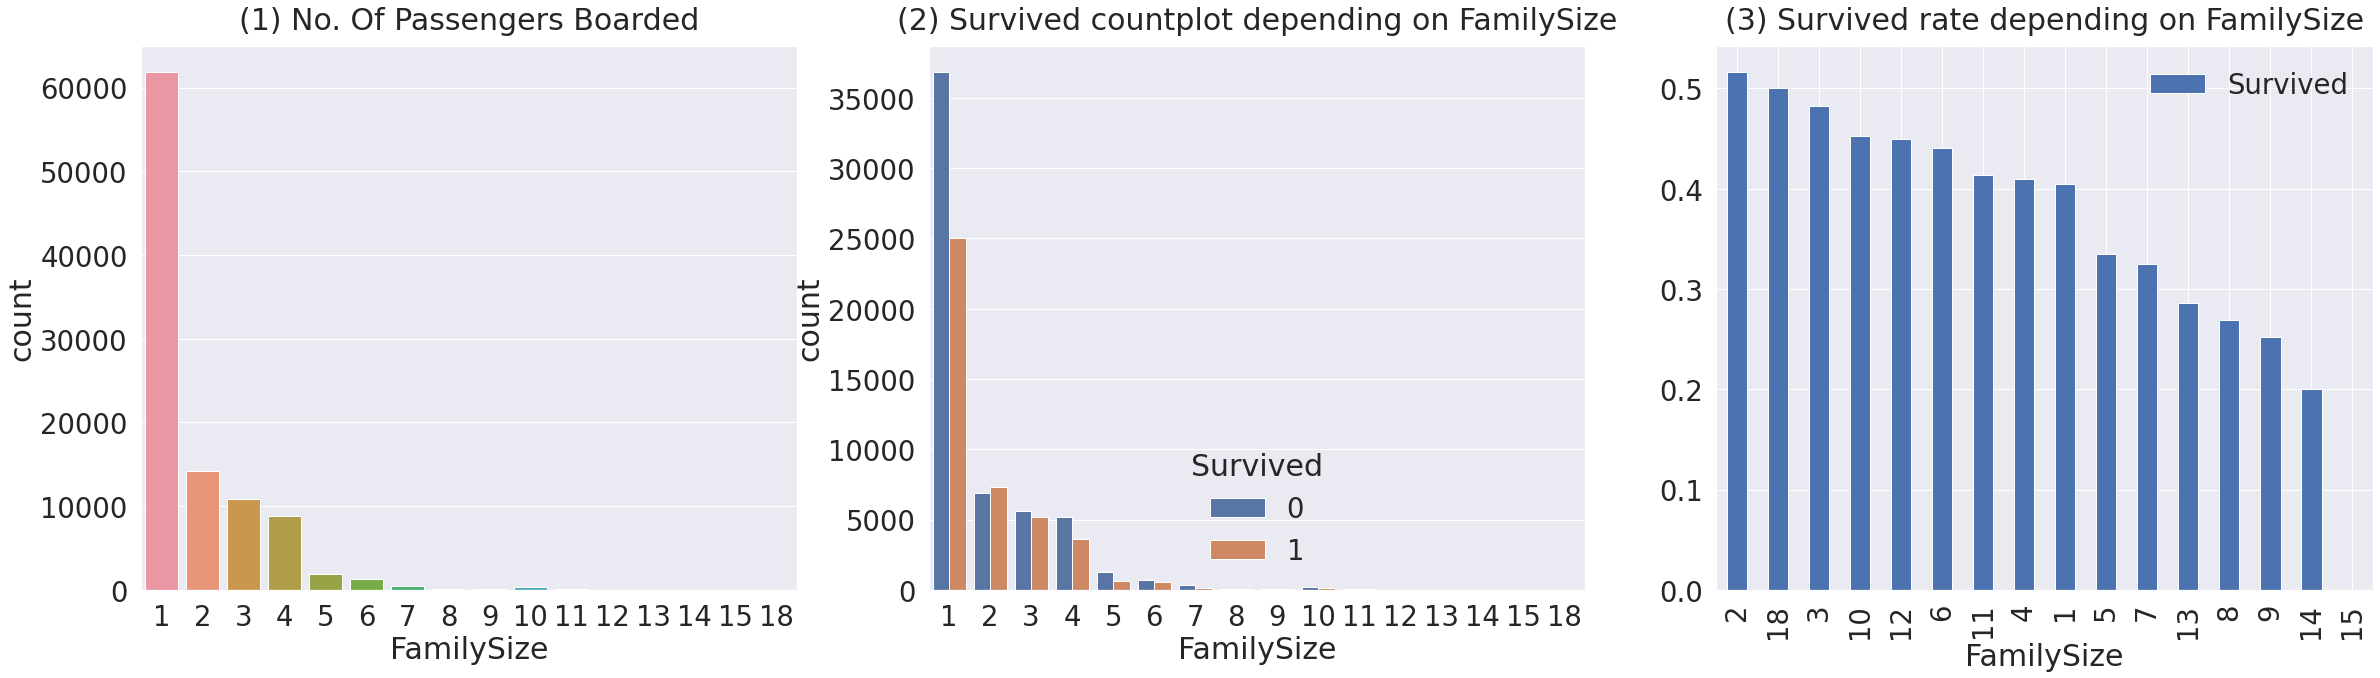

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure 1 - 가족크기가 1~11까지이며 대부분 1명이고 그 다음 2, 3, 4명

- Figure 2, 3 - 가족 크기에 따른 생존비교 가족이 4명인 경우가 가장 생존확률이 높고 가족수가 많은 수록(5, 6, 7, 8, 11)생존확률이 낮아짐 가족수가 너무 작아도(1) 너무 커도 생존확률이 작음 3~4명 선에서 생존확률이 높음

## 2.8 Fare
- Fare는 탑승요금이며, contious feature

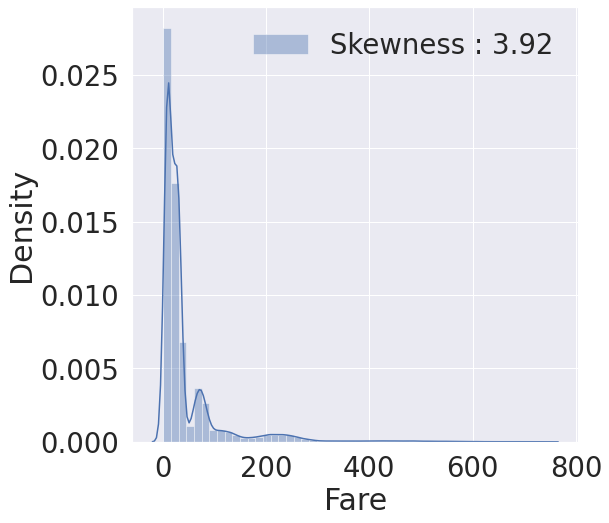

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭(high skewness) 몇개 없는 outlier에 대해서 너무 민감하게 반응한다면 실제 예측시 좋지 못한 결과를 부를 수 있음

- outlier의 영향을 줄이기 위해 Fare에 log를 취함

- pandas의 기능 dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 아래의 map 또는 apply를 사용하면 손쉽게 적용

- 원하는 것이 Fare columns의 데이터 모두를 log 값 취하는 것 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용됨

In [ ]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

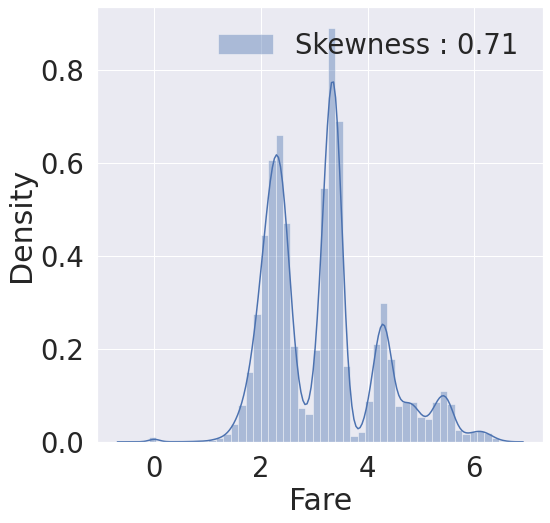

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니, 비대칭성이 많이 사라짐
- feature enginerring 부분

## 2.9 Cabin
- 이 feature는 NaN이 80%이므로 생존에 영향을 미칠 정보를 알아내기 쉽지 않음
- 그렇기 때문에 제외함

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,3.301009,C12239,S,3
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,2.591516,NaN,S,1
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,4.266756,NaN,S,4
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,2.568022,NaN,S,1
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,2.048982,NaN,S,1
